In [1]:
import pandas as pd
file_path = './ref/대구교통공사_역별일별시간별승하차인원현황_20250131.csv'
df = pd.read_csv(file_path, encoding='EUC-KR')
df.head(10) #데이터 5개 가져오기(데이터 잘 가져오나 확인하는 용도)
# df.tail()

,월,일,역번호,역명,승하차,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,1,1,1150,설화명곡,승차,50,40,78,104,144,...,188,168,170,136,79,76,38,23,8,2339
1,1,1,1150,설화명곡,하차,2,99,48,74,69,...,170,160,211,193,131,133,112,88,85,2140
2,1,1,1160,화원,승차,26,42,47,103,152,...,308,271,195,105,89,38,42,30,7,2811
3,1,1,1160,화원,하차,5,71,46,83,141,...,292,251,155,154,121,120,85,77,74,2830
4,1,1,1170,대곡,승차,23,48,70,119,162,...,179,182,161,132,83,81,41,36,8,2426
5,1,1,1170,대곡,하차,4,82,46,58,94,...,183,210,200,165,150,100,156,89,67,2299
6,1,1,1180,진천,승차,58,81,108,192,204,...,319,314,301,268,200,167,121,104,41,4266
7,1,1,1180,진천,하차,6,144,107,136,220,...,357,427,378,352,279,267,231,243,140,4594
8,1,1,1190,월배,승차,36,48,65,86,162,...,156,178,127,122,98,94,62,42,17,2120
9,1,1,1190,월배,하차,6,82,57,82,96,...,204,195,211,159,134,123,97,102,79,2365


In [2]:
columns1 = ['mon', 'date', 'num', 'name', 'type']
time_col = [f'{i}-{i+1}h'for i in range(5,24)]
columns = columns1 + time_col + ['total']
df.columns = columns
# df = df.iloc[:,:5]
df_selected = df.iloc[:, [0, 1, 2, 3, 4, -1]]

In [4]:
df_selected.head()

,mon,date,num,name,type,total
0,1,1,1150,설화명곡,승차,2339
1,1,1,1150,설화명곡,하차,2140
2,1,1,1160,화원,승차,2811
3,1,1,1160,화원,하차,2830
4,1,1,1170,대곡,승차,2426


In [6]:
data = df_selected.groupby(['mon', 'date', 'num', 'name']).sum().reset_index()
data

,mon,date,num,name,type,total
0,1,1,1150,설화명곡,승차하차,4479
1,1,1,1160,화원,승차하차,5641
2,1,1,1170,대곡,승차하차,4725
3,1,1,1180,진천,승차하차,8860
4,1,1,1190,월배,승차하차,4485
...,...,...,...,...,...,...
2909,1,31,3370,황금,승차하차,5786
2910,1,31,3380,수성못,승차하차,4200
2911,1,31,3390,지산,승차하차,4119
2912,1,31,3400,범물,승차하차,7457


In [7]:
gdata= data[['mon', 'date', 'num', 'name','total']]
gdata= gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,mon,date,num,name,total
30,1,1,1450,각산,4330
124,1,2,1450,각산,8360
218,1,3,1450,각산,8507
312,1,4,1450,각산,6509
406,1,5,1450,각산,4564
500,1,6,1450,각산,8542
594,1,7,1450,각산,8374
688,1,8,1450,각산,8324
782,1,9,1450,각산,7689
876,1,10,1450,각산,8043


In [8]:
mdata = gdata.groupby(by='name').sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,각산,220315
1,감삼,355648
2,강창,287943
3,건들바위,90492
4,경대병원,360447
...,...,...
89,학정,18176
90,해안,135095
91,현충로,168520
92,화원,218548


In [12]:
sdata=tdata.sort_values(by='total', ascending=False)
sdata.head(10)
total_data = sdata[:30]
total_data

,name,total
38,반월당2,1237305
24,동대구역,1056787
76,중앙로,914031
37,반월당1,650779
45,상인,582605
17,대구역,456205
78,진천,443825
47,서부정류장,439476
41,범어,414089
4,경대병원,360447


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

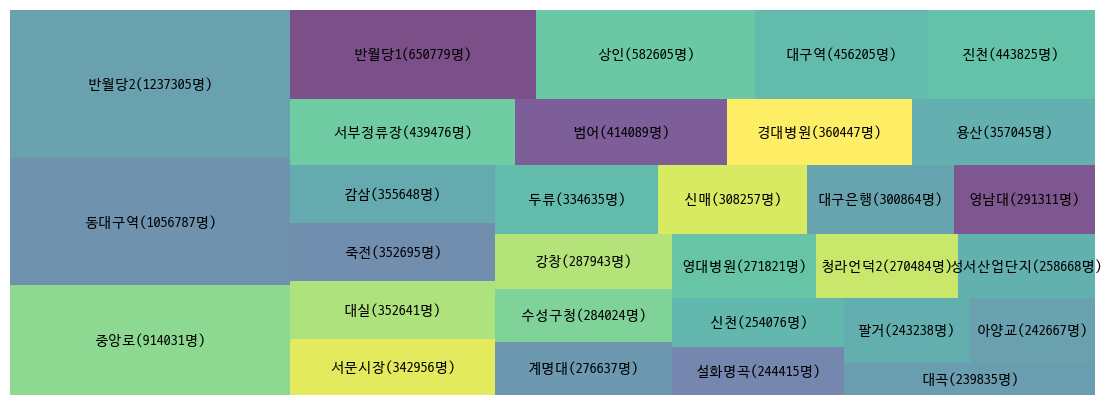

In [16]:
import squarify
plt.figure(figsize=(14,5))
# squarify.plot(sizes=sdata['total'].iloc[:20],label=sdata['name'].iloc[:20])
# squarify.plot(sizes=total_data['total'],label=total_data['name'], alpha=0.5)
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha= 0.7)
plt.rcParams['font.size'] = 8
# plt.rcParams['text.color'] = 'black'
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()